In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
file_path = "/content/BAC.csv"
df = pd.read_csv(file_path)

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,46.919998,47.180000,46.150002,47.080002,34.811729,16296700
1,2006-01-04,47.000000,47.240002,46.450001,46.580002,34.442013,17757900
2,2006-01-05,46.580002,46.830002,46.320000,46.639999,34.486385,14970700
3,2006-01-06,46.799999,46.910000,46.349998,46.570000,34.434616,12599800
4,2006-01-09,46.720001,46.970001,46.360001,46.599998,34.456806,15619400


In [14]:
df['Date'] = pd.to_datetime(df['Date'])
sns.set_style("darkgrid")

#Stock Closing Price Over Time


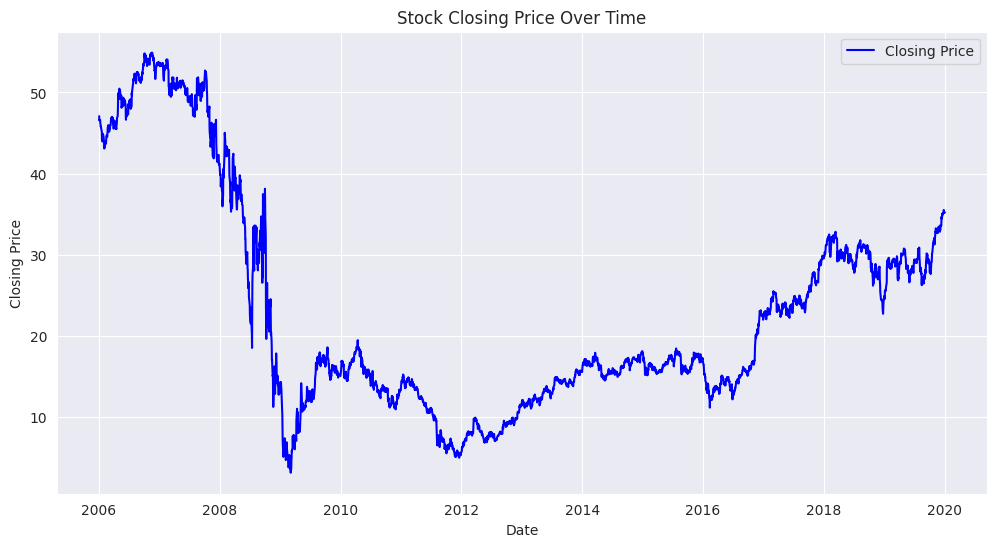

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='blue', label='Closing Price')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Closing Price Over Time")
plt.legend()
plt.show()

#Average Monthly Closing Price

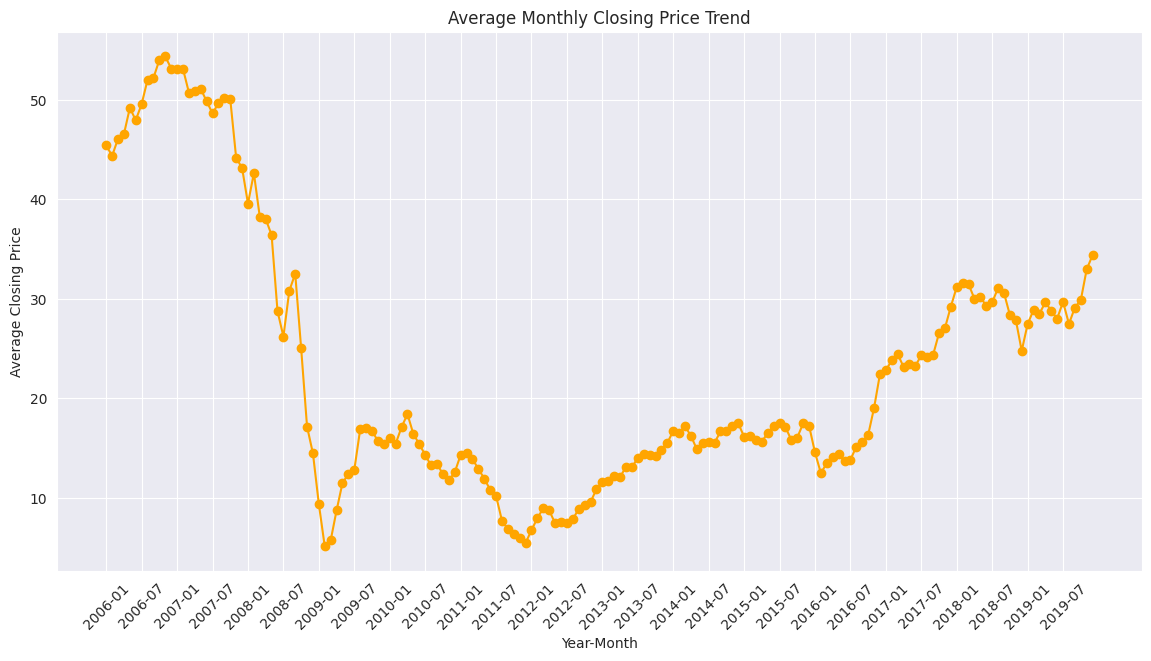

In [17]:
df['Year-Month'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('Year-Month')['Close'].mean()
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg.index.astype(str), monthly_avg, marker='o', linestyle='-', color='orange')
plt.xlabel("Year-Month")
plt.ylabel("Average Closing Price")
plt.title("Average Monthly Closing Price Trend")
plt.xticks(ticks=range(0, len(monthly_avg), 6), labels=monthly_avg.index[::6], rotation=45, fontsize=10)
plt.grid(True)
plt.show()

#Distribution of Closing Prices

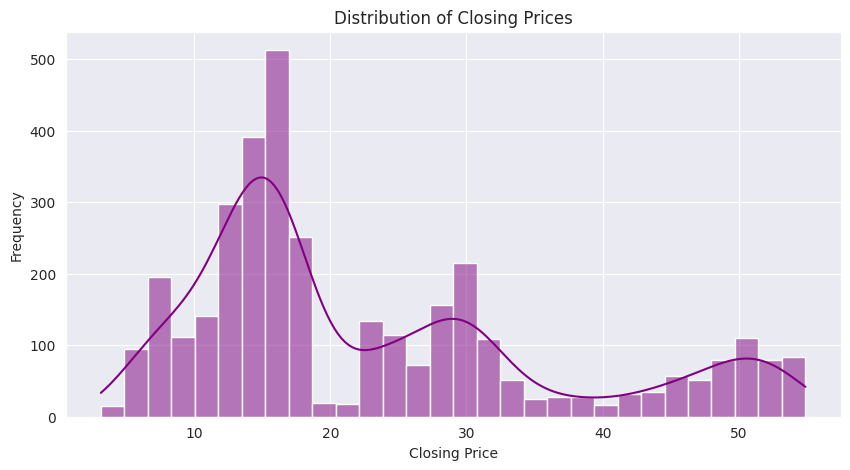

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], bins=30, kde=True, color='purple')
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.title("Distribution of Closing Prices")
plt.show()

#High vs Low Prices

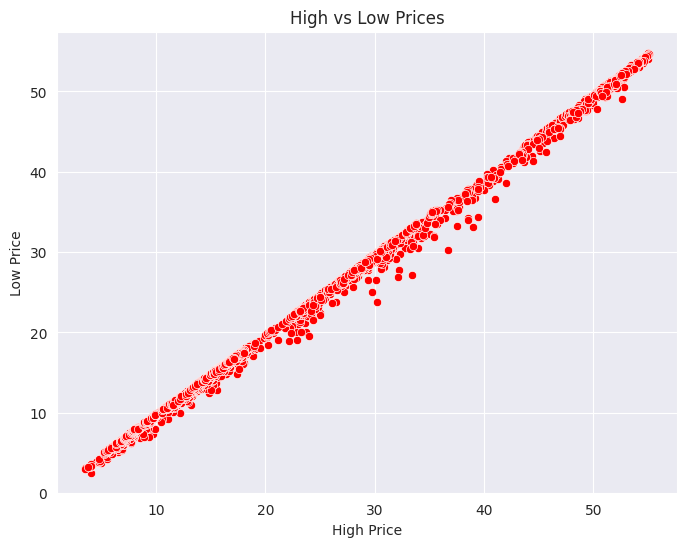

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['High'], y=df['Low'], color='red')
plt.xlabel("High Price")
plt.ylabel("Low Price")
plt.title("High vs Low Prices")
plt.show()


#Closing Price Variation

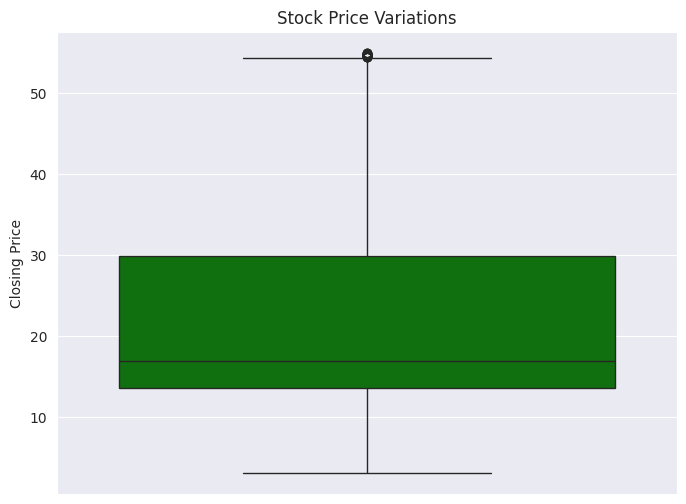

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Close'], color='green')
plt.ylabel("Closing Price")
plt.title("Stock Price Variations")
plt.show()

# Trading Volume Share by Year

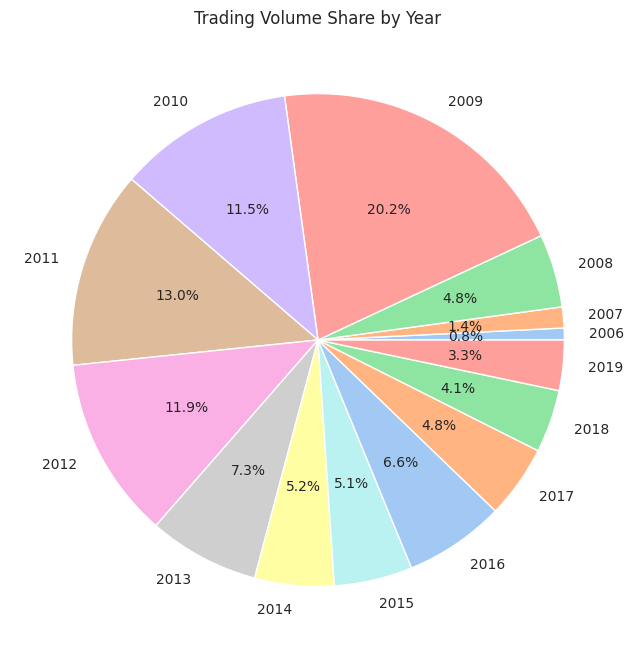

In [24]:
yearly_volume = df.groupby(df['Date'].dt.year)['Volume'].sum()
plt.figure(figsize=(8, 8))
plt.pie(yearly_volume, labels=yearly_volume.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Trading Volume Share by Year")
plt.show()

#Trading Volume Over Time

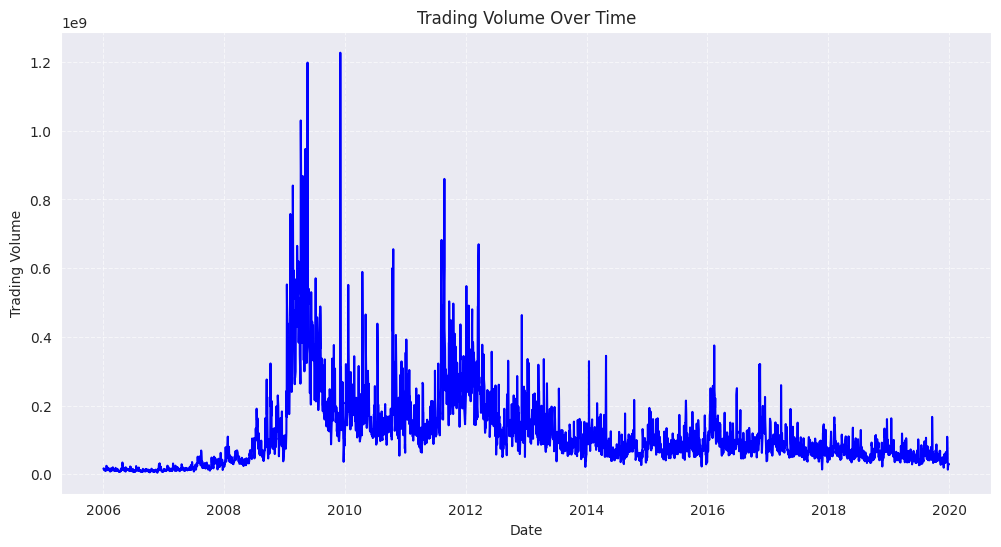

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], color='blue', linewidth=1.5)  # Use a line plot instead of bars
plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.title("Trading Volume Over Time")
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for better readability
plt.show()

#Stock Price Distribution by Year

<ipython-input-30-3b50a276694c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Year'].astype(str), y=df['Close'], palette='muted')


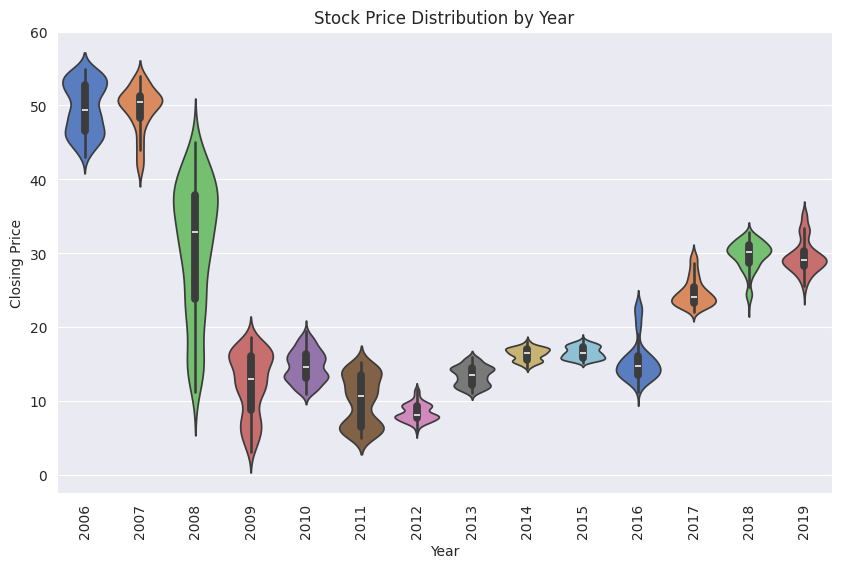

In [30]:
df['Year'] = df['Date'].dt.year
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Year'].astype(str), y=df['Close'], palette='muted')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Stock Price Distribution by Year")
plt.xticks(rotation=90)
plt.show()

#Average Monthly Trading Volume Distribution

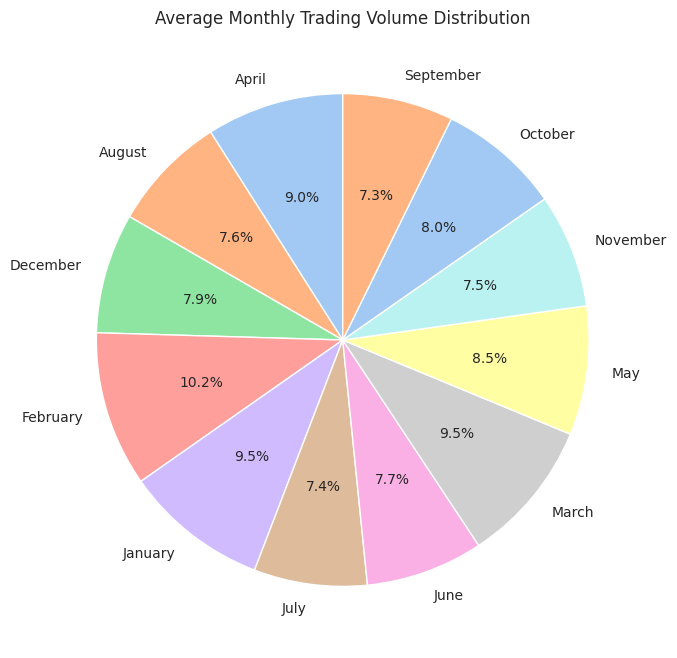

In [31]:
df['Month'] = df['Date'].dt.month_name()
monthly_volume = df.groupby('Month')['Volume'].mean()

plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')
plt.pie(monthly_volume, labels=monthly_volume.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Average Monthly Trading Volume Distribution")
plt.show()

#Total Trading Volume Per Year

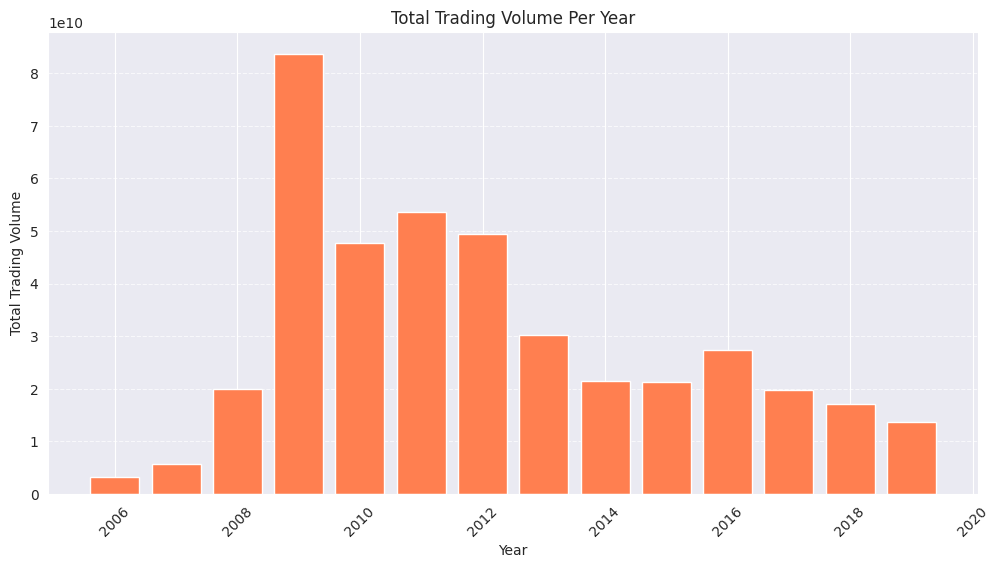

In [32]:
yearly_volume = df.groupby('Year')['Volume'].sum()

plt.figure(figsize=(12, 6))
plt.bar(yearly_volume.index, yearly_volume, color='coral')
plt.xlabel("Year")
plt.ylabel("Total Trading Volume")
plt.title("Total Trading Volume Per Year")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()